# Preparing the data

To prepare the data, we'll be following whars knows at the `ETL` process:

- `Extract` the data from a data source
- `transform` the data into a desirable format
- `load` the data into a suitable structure for analyzing

In order to the above, pytorch has two mandatory steps:
1. Subclass from torch's `Dataset` class that has class methods that must be created: `__len__ ` and `__getitem__`.
    - `Dataset` is what's known as an **abstract class**, which is a class that has methods that *must* be implemented.
2. Wrap your custom Dataset subclass with torch's `Dataloader`, which lets you access properties of your data.

Since **Fashion-mnist** is a built in dataset, we can skip this part (mostly).

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120) # sets linewidth for pytorch output printed to the console


# here, we EXTRACT the data and TRANSFORM it
train_set = torchvision.datasets.FashionMNIST(
    root="./data/FashionMNIST", # path to where the fashion mnist dataset is stored
    train=True, # we want the training data
    download=True, # download the data onto our machine
    transform=transforms.Compose([transforms.ToTensor()]) # can apply a composition of transformations to dataset. Here, we only convert the data into tensor format
)

# here, we LOAD the data into a dataloader so we can query/analyze it
train_loader = DataLoader(train_set, batch_size=10) # each batch holds 10 images


In [32]:
# observe the training set

print(len(train_set)) # 60000 training images

print(train_set.targets)# our target classes

print(train_set.targets.bincount()) # tells us how many samples are in each class. In this case, fmnist is uniform; same number of samples/class

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


2
<class 'tuple'>
Label: 9
torch.Size([1, 28, 28])


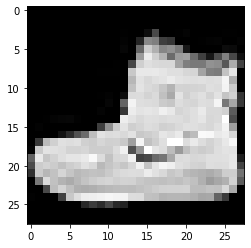

In [33]:
# access an individual sample from train set

sample = next(iter(train_set)) # iter returns an object that represents a stream of data that we can iterate over. next accesses the next element in the stream

# each sample is a 2-tuple: (image, label)
print(len(sample)) 
print(type(sample))

image, label = sample

print(f"Label: {label}")
print(image.shape) # 1 color channel, 28 height and width 

plt.imshow(image.squeeze(), cmap="gray") # squeeze out the unneeded dimension and show the image

2
<class 'list'>
torch.Size([10, 1, 28, 28])
torch.Size([10])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


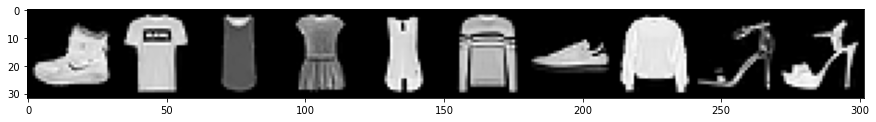

In [35]:
# Working with batches

batch = next(iter(train_loader))

print(len(batch))
print(type(batch))

images, labels = batch

print(images.shape) # 10 images of 1 color channel, 28/28 height and width 
print(labels.shape)



grid = torchvision.utils.make_grid(images, nrow=10) # nrow says how many images get displayed per row

print(labels)
plt.figure(figsize=(15,15)) # figsize changes the siaze of the image(s)
plt.imshow(grid.permute(1,2,0)) # need to permute them to display correctly. permute rearranges the tensor elements according to given shape

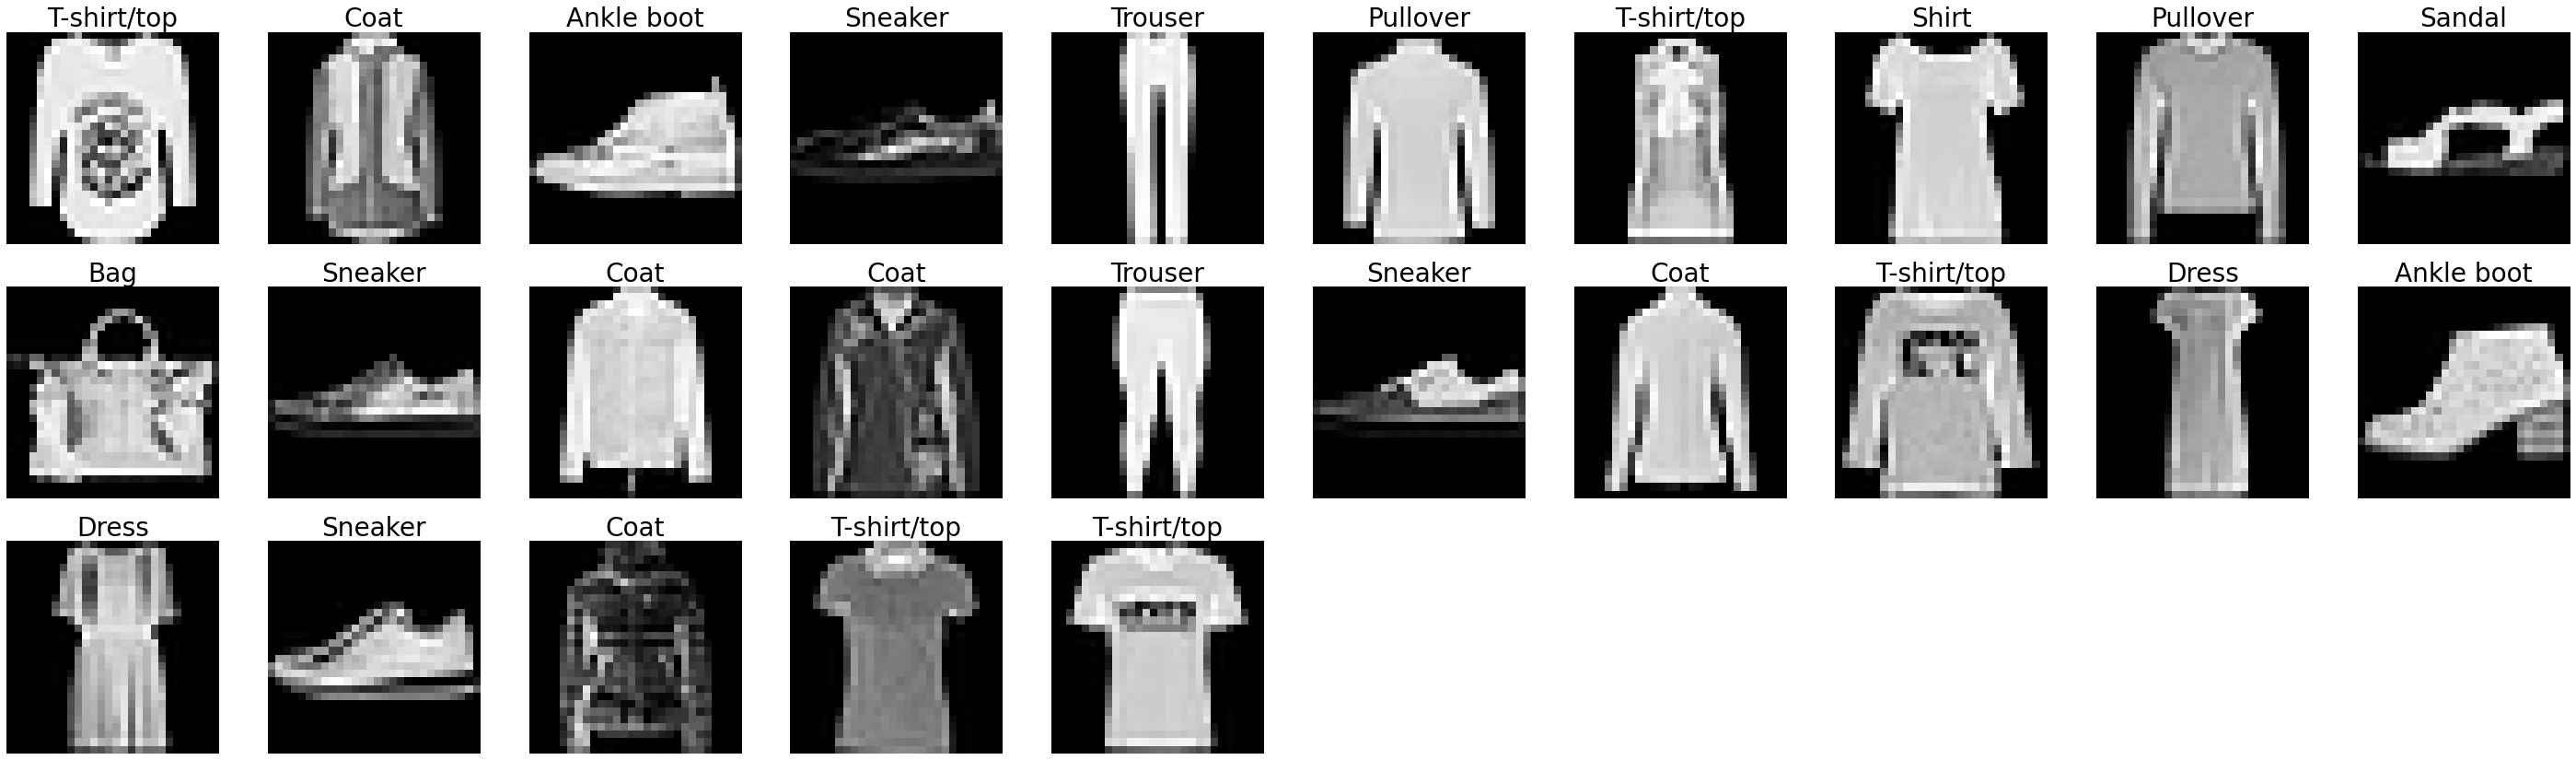

In [46]:
how_many_to_plot = 25

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()